In this notebook we use simple linear regression to predict sales using three
different advertising channels (tv,radio,newspaper)

##Reading and understanding the data



In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [ ]:
#Mountig the drive to get the data from drive in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading and checking the csv file
data=pd.read_csv("/content/drive/MyDrive/Data_colab_practice_august_2023/advertising.csv")
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### 1.1 Going through the data for more understanding

In [ ]:
data.shape

(200, 4)

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## 2. Visualising the data

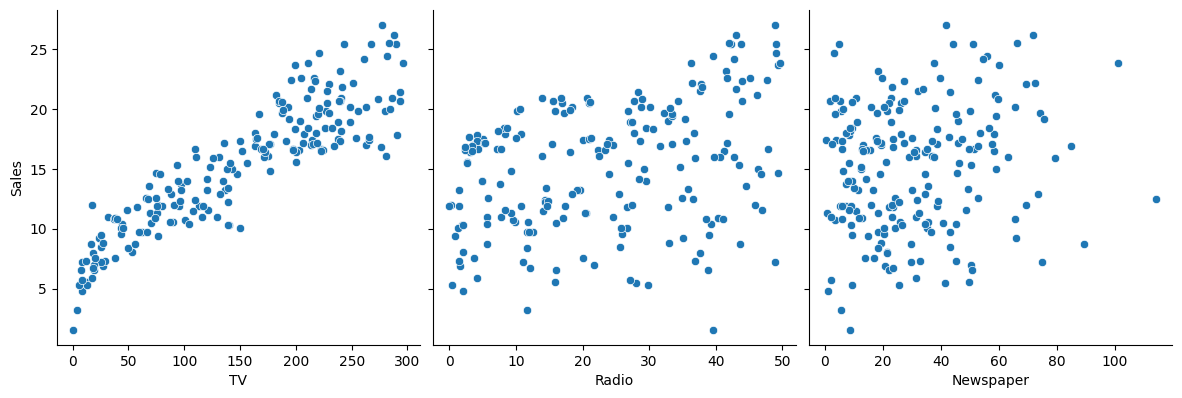

In [ ]:
sns.pairplot(data,x_vars=["TV", "Radio", "Newspaper"],y_vars="Sales",height=4,aspect=1,kind="scatter")
plt.show()

In [ ]:
#checking the corrilation between ad channel and sales
corr=data.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


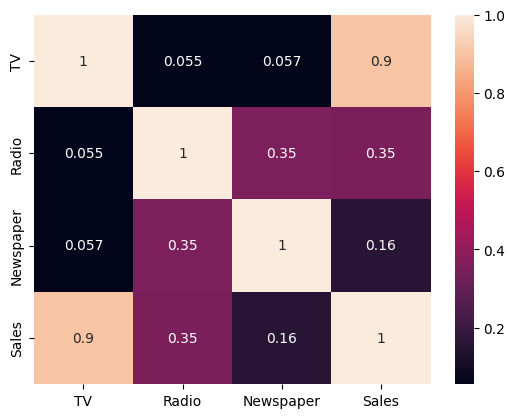

In [ ]:

sns.heatmap(corr,annot=True)
plt.show()

As seen from above visualisations, Tv can explain most of the variation in sales. so lets perform simple linear regression with Tv as feature variable

## 3.Linear regression

### 3.1 Using Statsmodels

In [ ]:
X=data["TV"]
y=data["Sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=99)

In [ ]:
X_test.shape

(60,)

In [ ]:
y_test.shape

(60,)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
166,1.0,17.9
172,1.0,19.6
57,1.0,136.2
158,1.0,11.7
116,1.0,139.2


In [ ]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [ ]:
lr_model.params

const    7.15229
TV       0.05427
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     582.5
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.25e-51
Time:                        12:36:02   Log-Likelihood:                -314.97
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1523      0.396     18.071      0.000       6.370       7.935
TV             0.0543      0.002     24.135      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.350   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.840   Jarque-Bera (JB):                0.449
Skew:                           0.112   Prob(JB):                        0.799
Kurtosis:                       2.837   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

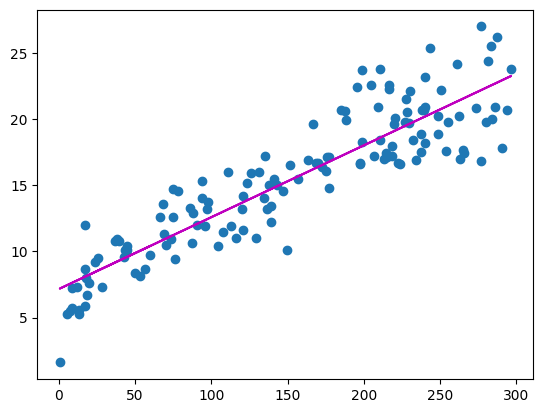

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,7.1523+0.0543*X_train,'m')
plt.show()

## Residual Analysis

In [ ]:
y_train.shape

(140,)

In [ ]:
y_train_pred=lr_model.predict(X_train_sm)
res=(y_train-y_train_pred)

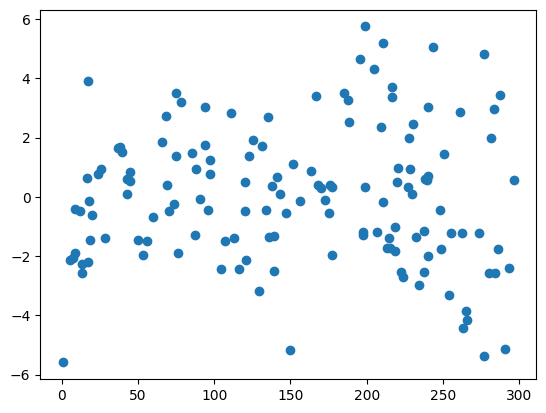

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

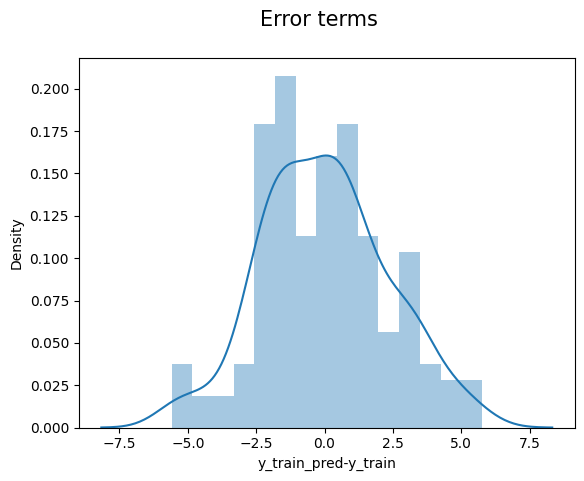

In [ ]:

fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle("Error terms",fontsize=15)
plt.xlabel('y_train_pred-y_train',fontsize=10)
plt.show()

##checking the predictions on the test set

In [ ]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred.head()

135     9.773520
127    11.504726
191    11.249658
66      8.861788
119     8.205124
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mse=np.sqrt(mean_squared_error(y_test,y_test_pred))

In [ ]:
r2_score(y_test,y_test_pred)

0.8138307576324338

#### Visualise the test set fit

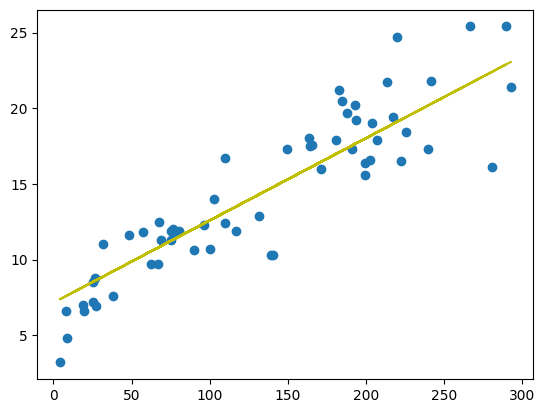

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.1523+0.0543*X_test,'y')
plt.show()

## 4. Linear Regression using sklearn library

In [ ]:
X_train_lm,X_test_lm,y_train_lm,y_test_lm=train_test_split(X,y,train_size=0.7,random_state=99)

In [ ]:
X_train_lm.shape

(140,)

In [ ]:
lm=LinearRegression()

In [ ]:
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [ ]:
lm.fit(X_train_lm,y_train_lm)

LinearRegression()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

7.152290398732854
[0.05426976]


We get the same equation as the statsmodels. so the sales can be explained with the equation sales=7.15+0.054*TV. Also scalling has no effect on the results